# Paper Figure 6: Quantification



In [1]:
import os
from test_files import get_files, prepare_test

tmp_folder = os.path.join(os.getcwd(),'temp/')
test_folder = 'fig6'

In [2]:
files = ['PXD006109_ref.txt', 'PXD006109_ref_evd.txt']
get_files(tmp_folder, files)
prepare_test(files, tmp_folder, test_folder)

100% [..........................................................................] 7481516 / 7481516Downloading F:\alphapept\sandbox\temp/test_files\PXD006109_ref_evd.txt.
100% [......................................................................] 129073445 / 129073445Creating dir F:\alphapept\sandbox\temp/fig6.


In [7]:
evidence_path = os.path.join(tmp_folder, test_folder, files[1])
protein_group_path = os.path.join(tmp_folder, test_folder, files[0])

In [8]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd
import numpy as np

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [58]:
ref = pd.read_csv(protein_group_path, sep='\t')

ref = ref.replace(0, np.nan)

In [59]:
species = []
for _ in ref['Protein IDs']:
    
    if 'HUM' in _:
        species.append('Homo sapiens')
        
    elif 'ECO' in _:
        species.append('Escherichia coli')
        
    else:
        species.append('X')
        
ref['Species'] = species

In [60]:
df_= ref.copy()
ds = [_ for _ in df_.columns if 'LFQ intensity' in _]
base_columns = [_ for _ in ds if '02' in _]
ratio_columns = [_ for _ in ds if '12' in _]
to_plot = pd.DataFrame()
to_plot['Species'] = df_['Species']
to_plot['base'] = df_[base_columns].median(axis=1)
to_plot['ratio'] = df_[ratio_columns].median(axis=1)
to_plot['base_cnt'] = df_[base_columns].notna().sum(axis=1)
to_plot['ratio_cnt'] = df_[ratio_columns].notna().sum(axis=1)
to_plot['ratio_'] = np.log2(to_plot['base'] / to_plot['ratio'])
to_plot['sum_'] = np.log2(to_plot['ratio'])
valid_mq = to_plot.query(f'ratio_cnt >= 2 and base_cnt >=2')

In [61]:
lookup_dict = dict(zip(ref['Protein IDs'].values, ref['Species'].values))

In [62]:
import numpy as np
df_ = pt.copy()
df_['Species'] = [lookup_dict[_] for _ in df_.index]

ds = [_ for _ in df_.columns if 'LFQ' in _]
base_columns = [_ for _ in ds if 'HeLa2' in _]
ratio_columns = [_ for _ in ds if 'HeLa12' in _]   
to_plot = pd.DataFrame()
to_plot['Species'] = df_['Species']
to_plot['base'] = df_[base_columns].median(axis=1)
to_plot['ratio'] = df_[ratio_columns].median(axis=1)
to_plot['base_cnt'] = df_[base_columns].notna().sum(axis=1)
to_plot['ratio_cnt'] = df_[ratio_columns].notna().sum(axis=1)
to_plot['ratio_'] = np.log2(to_plot['base'] / to_plot['ratio'])
to_plot['sum_'] = np.log2(to_plot['ratio'])
valid_ap = to_plot.query(f'ratio_cnt >= 2 and base_cnt >=2')

In [63]:
def get_species(valid):

    homo = valid[valid['Species'] == 'Homo sapiens']
    e_coli = valid[valid['Species'] == 'Escherichia coli']
    
    return homo, e_coli

In [64]:
homo_mq, e_coli_mq = get_species(valid_mq)
homo_ap, e_coli_ap = get_species(valid_ap)

Homo 0.36
Ecoli 1.07


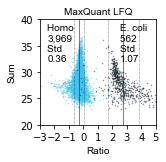

In [66]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

hfont = {'fontname':'Arial', 'size':10}

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

plt.figure(figsize=(2.363,2.363)) #60x60
plt.plot(homo_mq['ratio_'], homo_mq['sum_'], '.', alpha=0.5, color = light_blue, markersize=1)
plt.plot(e_coli_mq['ratio_'], e_coli_mq['sum_'], '.', alpha=0.5, color = dark_blue, markersize=1)

mean_ = homo_mq['ratio_'].mean()
std_ = homo_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Homo {std_:.2f}')
plt.text(-2.5, 32, f'Homo \n{len(homo_mq):,}\nStd \n{std_:.2f}', **hfont)

mean_ = e_coli_mq['ratio_'].mean()
std_ = e_coli_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Ecoli {std_:.2f}')

plt.text(2.5, 32, f'E. coli\n{len(e_coli_mq):,} \nStd \n{std_:.2f}', **hfont)

plt.xlim([-3, 5])
plt.ylim([20, 40])
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Ratio', **hfont)
plt.ylabel('Sum', **hfont)
plt.title('MaxQuant LFQ', **hfont)
plt.tight_layout()
plt.xticks([-3,-2,-1,0,1,2,3,4,5])
plt.savefig('figures/06_mq.pdf')
plt.show()

Std 0.31
Ecoli 0.55


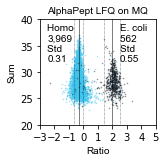

In [67]:
plt.figure(figsize=(2.363,2.363)) #60x60
plt.plot(homo_ap['ratio_'], homo_ap['sum_'], '.', alpha=0.5, color = light_blue, markersize=1)
plt.plot(e_coli_ap['ratio_'], e_coli_ap['sum_'], '.', alpha=0.5, color = dark_blue, markersize=1)

mean_ = homo_ap['ratio_'].mean()
std_ = homo_ap['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

plt.text(-2.5, 32, f'Homo \n{len(homo_mq):,}\nStd \n{std_:.2f}', **hfont)

print(f'Std {std_:.2f}')

mean_ = e_coli_ap['ratio_'].mean()
std_ = e_coli_ap['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Ecoli {std_:.2f}')

plt.text(2.5, 32, f'E. coli\n{len(e_coli_mq):,} \nStd \n{std_:.2f}', **hfont)


plt.xlim([-3, 5])
plt.ylim([20, 40])
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Ratio', **hfont)
plt.ylabel('Sum', **hfont)
plt.title('AlphaPept LFQ on MQ', **hfont)
plt.tight_layout()
plt.xticks([-3,-2,-1,0,1,2,3,4,5])
plt.savefig('figures/06_ap.pdf')
plt.show()

In [68]:
ref = pd.read_hdf('E:/benchmark/PXD006109/Shotgun/results.hdf', 'protein_table')
species = []
for _ in ref.index:
    
    if 'HUM' in _:
        species.append('Homo sapiens')
        
    elif 'ECO' in _:
        species.append('Escherichia coli')
        
    else:
        species.append('X')

In [69]:
import numpy as np
ref['Species'] = species
df_= ref.copy()
ds = [_ for _ in df_.columns if '_LFQ' in _]
base_columns = [_ for _ in ds if 'HeLa2' in _]
ratio_columns = [_ for _ in ds if 'HeLa12' in _]
to_plot = pd.DataFrame()
to_plot['Species'] = df_['Species']
to_plot['base'] = df_[base_columns].median(axis=1)
to_plot['ratio'] = df_[ratio_columns].median(axis=1)
to_plot['base_cnt'] = df_[base_columns].notna().sum(axis=1)
to_plot['ratio_cnt'] = df_[ratio_columns].notna().sum(axis=1)
to_plot['ratio_'] = np.log2(to_plot['base'] / to_plot['ratio'])
to_plot['sum_'] = np.log2(to_plot['ratio'])
valid_ap = to_plot.query(f'ratio_cnt >= 2 and base_cnt >=2')

In [70]:
homo_mq, e_coli_mq = get_species(valid_ap)

Homo 0.27
Ecoli 0.46


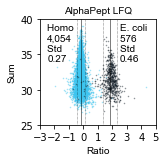

In [71]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

hfont = {'fontname':'Arial', 'size':10}

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

plt.figure(figsize=(2.363,2.363)) #60x60
plt.plot(homo_mq['ratio_'], homo_mq['sum_'], '.', alpha=0.5, color = light_blue, markersize=1)
plt.plot(e_coli_mq['ratio_'], e_coli_mq['sum_'], '.', alpha=0.5, color = dark_blue, markersize=1)

mean_ = homo_mq['ratio_'].mean()
std_ = homo_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Homo {std_:.2f}')
plt.text(-2.5, 34, f'Homo \n{len(homo_mq):,}\nStd \n{std_:.2f}', **hfont)

mean_ = e_coli_mq['ratio_'].mean()
std_ = e_coli_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Ecoli {std_:.2f}')

plt.text(2.5, 34, f'E. coli\n{len(e_coli_mq):,} \nStd \n{std_:.2f}', **hfont)

plt.xlim([-3, 5])
plt.ylim([25, 40])
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Ratio', **hfont)
plt.ylabel('Sum', **hfont)
plt.title('AlphaPept LFQ', **hfont)
plt.tight_layout()
plt.xticks([-3,-2,-1,0,1,2,3,4,5])
plt.savefig('figures/06_ap_full.pdf')
plt.show()

In [72]:
import alphapept.quantification
from tqdm import tqdm as tqdm
import numpy as np
import pandas as pd

from itertools import combinations
from numba.typed import List
from time import time
from tqdm import tqdm

import alphapept.quantification

n_samples = 20

column_combinations = List()
[column_combinations.append(_) for _ in combinations(range(n_samples), 2)]



results = []
for run in tqdm(range(200)):
    for n_sequences in range(2,20):
    
        signal, sample, ground_truth = alphapept.quantification.generate_dummy_data(n_sequences, n_samples)
        ratios = alphapept.quantification.get_protein_ratios(signal.values, column_combinations)

        for method in ['L-BFGS-B', 'SLSQP', 'Powell','trf']:
            error = False
            start = time()
            
            try:
                solution, success = alphapept.quantification.solve_profile(ratios, method)
                
                if not success:
                    solution = np.zeros(ratios.shape[0])
            except Exception as e:
                print(e)
                error = True
                solution = np.zeros(ratios.shape[0])
               
            mape = np.mean(np.abs((solution-ground_truth)/ground_truth))
                    
            end = time()

            time_elapsed_s = (end-start)

            results.append((method, time_elapsed_s, mape, error, success, n_sequences, run))
    
result_df = pd.DataFrame(results, columns=['Method', 'Time Elapsed (s)', 'Mean absolute percentage error', 'Errors', 'Success', 'Sequences', 'Run'])


  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:2970: RuntimeWarning: invalid value encountered in subtract
  if (fx2 - fval) > delta:
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:2979: RuntimeWarning: invalid value encountered in subtract
  if 2.0 * (fx - fval) <= bnd:


Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
  0%|▍                                                                                 | 1/200 [00:16<54:04, 16.30s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  1%|▊                                                                                 | 2/200 [00:28<46:10, 13.99s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  2%|█▏                                                                                | 3/200 [00:40<43:02, 13.11s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  2%|█▋                                                                                | 4/200 [00:54<43:42, 13.38s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  2%|██                                                                                | 5/200 [01:07<42:36, 13.11s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  3%|██▍                                                                               | 6/200 [01:19<41:31, 12.84s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  4%|██▊                                                                               | 7/200 [01:31<40:29, 12.59s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  4%|███▎                                                                              | 8/200 [01:43<39:51, 12.46s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  4%|███▋                                                                              | 9/200 [01:57<40:44, 12.80s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  5%|████                                                                             | 10/200 [02:10<40:28, 12.78s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  6%|████▍                                                                            | 11/200 [02:23<41:08, 13.06s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  6%|████▊                                                                            | 12/200 [02:35<40:02, 12.78s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  6%|█████▎                                                                           | 13/200 [02:47<38:49, 12.46s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  7%|█████▋                                                                           | 14/200 [03:00<39:26, 12.72s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  8%|██████                                                                           | 15/200 [03:12<38:16, 12.41s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  8%|██████▍                                                                          | 16/200 [03:25<38:39, 12.60s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  8%|██████▉                                                                          | 17/200 [03:38<38:35, 12.65s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


  9%|███████▎                                                                         | 18/200 [03:50<37:47, 12.46s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 10%|███████▋                                                                         | 19/200 [04:04<38:36, 12.80s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 10%|████████                                                                         | 20/200 [04:17<38:43, 12.91s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 10%|████████▌                                                                        | 21/200 [04:29<38:01, 12.74s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 11%|████████▉                                                                        | 22/200 [04:43<39:04, 13.17s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 12%|█████████▎                                                                       | 23/200 [04:56<38:51, 13.17s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 12%|█████████▋                                                                       | 24/200 [05:09<38:16, 13.05s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 12%|██████████▏                                                                      | 25/200 [05:23<38:50, 13.31s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 13%|██████████▌                                                                      | 26/200 [05:36<38:27, 13.26s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 14%|██████████▉                                                                      | 27/200 [05:49<38:00, 13.18s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 14%|███████████▎                                                                     | 28/200 [06:03<37:54, 13.22s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 14%|███████████▋                                                                     | 29/200 [06:16<37:59, 13.33s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 15%|████████████▏                                                                    | 30/200 [06:30<37:50, 13.36s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 16%|████████████▌                                                                    | 31/200 [06:43<37:19, 13.25s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 16%|████████████▉                                                                    | 32/200 [06:55<36:38, 13.09s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 16%|█████████████▎                                                                   | 33/200 [07:09<36:40, 13.18s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 17%|█████████████▊                                                                   | 34/200 [07:21<35:39, 12.89s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 18%|██████████████▏                                                                  | 35/200 [07:33<34:47, 12.65s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 18%|██████████████▌                                                                  | 36/200 [07:46<34:32, 12.63s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 18%|██████████████▉                                                                  | 37/200 [07:59<35:02, 12.90s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 19%|███████████████▍                                                                 | 38/200 [08:12<34:35, 12.81s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 20%|███████████████▊                                                                 | 39/200 [08:24<33:50, 12.61s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 20%|████████████████▏                                                                | 40/200 [08:36<33:24, 12.53s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 20%|████████████████▌                                                                | 41/200 [08:49<33:44, 12.73s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 21%|█████████████████                                                                | 42/200 [09:02<33:18, 12.65s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 22%|█████████████████▍                                                               | 43/200 [09:14<33:00, 12.61s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 22%|█████████████████▊                                                               | 44/200 [09:27<32:34, 12.53s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 22%|██████████████████▏                                                              | 45/200 [09:40<32:52, 12.73s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 23%|██████████████████▋                                                              | 46/200 [09:52<31:55, 12.44s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 24%|███████████████████                                                              | 47/200 [10:05<32:07, 12.60s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 24%|███████████████████▍                                                             | 48/200 [10:20<33:54, 13.38s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 24%|███████████████████▊                                                             | 49/200 [10:34<34:08, 13.56s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 25%|████████████████████▎                                                            | 50/200 [10:46<33:10, 13.27s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 26%|████████████████████▋                                                            | 51/200 [10:58<31:57, 12.87s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 26%|█████████████████████                                                            | 52/200 [11:12<32:36, 13.22s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 26%|█████████████████████▍                                                           | 53/200 [11:26<32:34, 13.29s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 27%|█████████████████████▊                                                           | 54/200 [11:39<32:10, 13.22s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 28%|██████████████████████▎                                                          | 55/200 [11:52<31:32, 13.05s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 28%|██████████████████████▋                                                          | 56/200 [12:04<30:56, 12.89s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 28%|███████████████████████                                                          | 57/200 [12:17<30:43, 12.89s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 29%|███████████████████████▍                                                         | 58/200 [12:29<30:07, 12.73s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 30%|███████████████████████▉                                                         | 59/200 [12:42<30:03, 12.79s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 30%|████████████████████████▎                                                        | 60/200 [12:55<29:46, 12.76s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 30%|████████████████████████▋                                                        | 61/200 [13:08<29:44, 12.84s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 31%|█████████████████████████                                                        | 62/200 [13:21<29:41, 12.91s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 32%|█████████████████████████▌                                                       | 63/200 [13:34<29:33, 12.94s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 32%|█████████████████████████▉                                                       | 64/200 [13:47<29:24, 12.98s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 32%|██████████████████████████▎                                                      | 65/200 [14:02<30:42, 13.65s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 33%|██████████████████████████▋                                                      | 66/200 [14:30<39:58, 17.90s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 34%|███████████████████████████▏                                                     | 67/200 [15:05<50:54, 22.97s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 34%|███████████████████████████▌                                                     | 68/200 [15:32<53:02, 24.11s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 34%|███████████████████████████▉                                                     | 69/200 [16:02<56:36, 25.93s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 35%|████████████████████████████▎                                                    | 70/200 [16:26<54:56, 25.36s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 36%|████████████████████████████▊                                                    | 71/200 [16:53<55:22, 25.76s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 36%|█████████████████████████████▏                                                   | 72/200 [17:16<53:37, 25.14s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 36%|█████████████████████████████▌                                                   | 73/200 [17:29<45:19, 21.41s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 37%|█████████████████████████████▉                                                   | 74/200 [17:42<39:41, 18.90s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 38%|██████████████████████████████▍                                                  | 75/200 [17:55<35:40, 17.12s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 38%|██████████████████████████████▊                                                  | 76/200 [18:07<32:25, 15.69s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 38%|███████████████████████████████▏                                                 | 77/200 [18:20<30:22, 14.82s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 39%|███████████████████████████████▌                                                 | 78/200 [18:33<28:52, 14.20s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 40%|███████████████████████████████▉                                                 | 79/200 [18:47<28:41, 14.23s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 40%|████████████████████████████████▍                                                | 80/200 [19:01<28:10, 14.08s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 40%|████████████████████████████████▊                                                | 81/200 [19:15<27:42, 13.97s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 41%|█████████████████████████████████▏                                               | 82/200 [19:28<26:58, 13.71s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 42%|█████████████████████████████████▌                                               | 83/200 [19:41<26:29, 13.59s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 42%|██████████████████████████████████                                               | 84/200 [19:56<27:01, 13.98s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 42%|██████████████████████████████████▍                                              | 85/200 [20:15<29:35, 15.44s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 43%|██████████████████████████████████▊                                              | 86/200 [20:29<28:41, 15.10s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 44%|███████████████████████████████████▏                                             | 87/200 [20:42<27:15, 14.47s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 44%|███████████████████████████████████▋                                             | 88/200 [20:55<26:16, 14.08s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 44%|████████████████████████████████████                                             | 89/200 [21:10<26:16, 14.21s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 45%|████████████████████████████████████▍                                            | 90/200 [21:23<25:32, 13.93s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 46%|████████████████████████████████████▊                                            | 91/200 [21:37<25:07, 13.83s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 46%|█████████████████████████████████████▎                                           | 92/200 [21:50<24:23, 13.55s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 46%|█████████████████████████████████████▋                                           | 93/200 [22:02<23:40, 13.28s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 47%|██████████████████████████████████████                                           | 94/200 [22:17<24:18, 13.76s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 48%|██████████████████████████████████████▍                                          | 95/200 [22:29<23:21, 13.35s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 48%|██████████████████████████████████████▉                                          | 96/200 [22:43<23:04, 13.31s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 48%|███████████████████████████████████████▎                                         | 97/200 [22:57<23:17, 13.57s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 49%|███████████████████████████████████████▋                                         | 98/200 [23:10<22:59, 13.52s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 50%|████████████████████████████████████████                                         | 99/200 [23:24<22:45, 13.52s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 50%|████████████████████████████████████████                                        | 100/200 [23:38<22:48, 13.69s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 50%|████████████████████████████████████████▍                                       | 101/200 [23:50<21:50, 13.24s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 51%|████████████████████████████████████████▊                                       | 102/200 [24:04<22:09, 13.56s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 52%|█████████████████████████████████████████▏                                      | 103/200 [24:18<21:54, 13.56s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 52%|█████████████████████████████████████████▌                                      | 104/200 [24:31<21:27, 13.41s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 52%|██████████████████████████████████████████                                      | 105/200 [24:44<20:56, 13.23s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 53%|██████████████████████████████████████████▍                                     | 106/200 [24:58<21:15, 13.56s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 54%|██████████████████████████████████████████▊                                     | 107/200 [25:12<21:09, 13.65s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 54%|███████████████████████████████████████████▏                                    | 108/200 [25:25<20:31, 13.39s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 55%|███████████████████████████████████████████▌                                    | 109/200 [25:37<19:53, 13.11s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 55%|████████████████████████████████████████████                                    | 110/200 [25:50<19:18, 12.87s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 56%|████████████████████████████████████████████▍                                   | 111/200 [26:03<19:19, 13.02s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 56%|████████████████████████████████████████████▊                                   | 112/200 [26:17<19:34, 13.35s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 56%|█████████████████████████████████████████████▏                                  | 113/200 [26:31<19:33, 13.49s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 57%|█████████████████████████████████████████████▌                                  | 114/200 [26:45<19:47, 13.81s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 57%|██████████████████████████████████████████████                                  | 115/200 [26:59<19:31, 13.78s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 58%|██████████████████████████████████████████████▍                                 | 116/200 [27:12<19:02, 13.60s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 58%|██████████████████████████████████████████████▊                                 | 117/200 [27:26<18:53, 13.65s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 59%|███████████████████████████████████████████████▏                                | 118/200 [27:40<18:45, 13.73s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 60%|███████████████████████████████████████████████▌                                | 119/200 [27:53<18:13, 13.50s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 60%|████████████████████████████████████████████████                                | 120/200 [28:07<18:06, 13.58s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 60%|████████████████████████████████████████████████▍                               | 121/200 [28:21<18:13, 13.85s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 61%|████████████████████████████████████████████████▊                               | 122/200 [28:34<17:40, 13.60s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 62%|█████████████████████████████████████████████████▏                              | 123/200 [28:48<17:39, 13.76s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 62%|█████████████████████████████████████████████████▌                              | 124/200 [29:03<17:53, 14.13s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 62%|██████████████████████████████████████████████████                              | 125/200 [29:17<17:33, 14.05s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 63%|██████████████████████████████████████████████████▍                             | 126/200 [29:30<16:44, 13.57s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 64%|██████████████████████████████████████████████████▊                             | 127/200 [29:43<16:35, 13.63s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 64%|███████████████████████████████████████████████████▏                            | 128/200 [29:58<16:34, 13.82s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 64%|███████████████████████████████████████████████████▌                            | 129/200 [30:12<16:42, 14.12s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 65%|████████████████████████████████████████████████████                            | 130/200 [30:26<16:20, 14.01s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 66%|████████████████████████████████████████████████████▍                           | 131/200 [30:38<15:26, 13.43s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 66%|████████████████████████████████████████████████████▊                           | 132/200 [30:52<15:26, 13.62s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [31:07<15:23, 13.78s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [31:20<15:03, 13.69s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 68%|██████████████████████████████████████████████████████                          | 135/200 [31:33<14:31, 13.40s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [31:46<14:12, 13.32s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [32:00<14:18, 13.62s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [32:13<13:53, 13.44s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [32:27<13:44, 13.51s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 70%|████████████████████████████████████████████████████████                        | 140/200 [32:42<13:51, 13.86s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [32:56<13:41, 13.92s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [33:09<13:17, 13.75s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [33:23<13:05, 13.79s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [33:36<12:36, 13.51s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 72%|██████████████████████████████████████████████████████████                      | 145/200 [33:51<12:43, 13.89s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [34:05<12:32, 13.94s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [34:19<12:18, 13.94s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [34:31<11:42, 13.51s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [34:46<11:56, 14.05s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 75%|████████████████████████████████████████████████████████████                    | 150/200 [35:01<11:44, 14.10s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [35:14<11:25, 14.00s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [35:28<11:13, 14.03s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [35:43<11:06, 14.18s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [35:58<11:02, 14.41s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [36:12<10:41, 14.26s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [36:27<10:39, 14.53s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [36:39<09:55, 13.85s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [36:53<09:44, 13.91s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [37:07<09:30, 13.90s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 80%|████████████████████████████████████████████████████████████████                | 160/200 [37:22<09:24, 14.11s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [37:36<09:13, 14.19s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [37:49<08:49, 13.94s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [38:03<08:28, 13.75s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [38:17<08:18, 13.85s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [38:33<08:33, 14.68s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [38:47<08:09, 14.38s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [39:01<07:49, 14.22s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [39:15<07:34, 14.21s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [39:29<07:16, 14.08s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [39:43<06:59, 13.97s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [39:57<06:48, 14.09s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [40:11<06:30, 13.95s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [40:24<06:15, 13.90s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [40:39<06:02, 13.95s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [40:52<05:42, 13.69s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [41:06<05:30, 13.77s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [41:19<05:16, 13.74s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [41:33<05:05, 13.87s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [41:46<04:46, 13.63s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [42:00<04:32, 13.63s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [42:13<04:13, 13.35s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [42:27<04:03, 13.55s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [42:41<03:53, 13.72s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [42:55<03:40, 13.75s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [43:09<03:29, 14.00s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [43:22<03:10, 13.59s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [43:35<02:55, 13.52s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [43:49<02:42, 13.55s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [44:02<02:27, 13.38s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [44:17<02:17, 13.78s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [44:32<02:07, 14.18s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [44:45<01:50, 13.86s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [44:59<01:37, 13.95s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [45:12<01:22, 13.71s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [45:25<01:07, 13.48s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [45:38<00:53, 13.40s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [45:53<00:41, 13.80s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [46:07<00:27, 13.74s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [46:21<00:13, 13.80s/it]

Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [46:35<00:00, 13.98s/it]


In [73]:
result_df['Error relative to mean'] = result_df['Mean absolute percentage error'] / result_df.groupby(['Sequences','Run'])['Mean absolute percentage error'].transform(np.mean)
result_df_ = result_df[result_df["Success"]]

grouped_mean = result_df_.groupby(['Method']).mean().reset_index()

grouped_std = result_df_.groupby(['Method']).std().reset_index()
grouped_cnt = result_df_.groupby(['Method']).count().reset_index()

<Figure size 170.136x170.136 with 0 Axes>

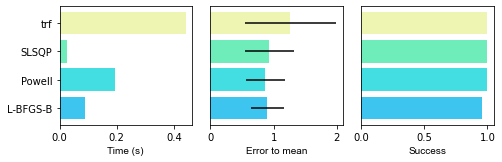

In [74]:
dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

colors = [light_blue, teal, green, yellow]

hfont = {'fontname':'Arial', 'size':10}
plt.figure(figsize=(2.363,2.363)) #60x60

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(2.363*3,2.363))

ax1.barh(grouped_mean['Method'], grouped_mean['Time Elapsed (s)'], color = colors)

ax1.set_xlabel('Time (s)', **hfont)

ax2.barh(grouped_mean['Method'], grouped_mean['Error relative to mean'], xerr = grouped_std['Error relative to mean'].values, color = colors)

ax2.set_xlabel('Error to mean', **hfont)

ax3.barh(grouped_mean['Method'], grouped_cnt['Success']/max(grouped_cnt['Success']), color = colors)

ax3.set_xlabel('Success', **hfont)

ax2.set_yticks([])
ax3.set_yticks([])
#plt.suptitle('Optimizer comparison', **hfont)

plt.tight_layout()
plt.savefig('figures/06_comparsion.pdf')
plt.show()


In [75]:
grouped_mean.iloc[3]['Time Elapsed (s)'] / grouped_mean.iloc[2]['Time Elapsed (s)']

15.96069967477948

In [76]:
grouped_cnt['Success']/max(grouped_cnt['Success'])

0    0.958654
1    1.000000
2    1.000000
3    0.997596
Name: Success, dtype: float64

In [77]:
grouped_mean

,Method,Time Elapsed (s),Mean absolute percentage error,Errors,Success,Sequences,Run,Error relative to mean
0,L-BFGS-B,0.089736,0.016038,False,True,13.351053,98.736710,0.901502
1,Powell,0.193490,0.015420,False,True,13.352885,98.901442,0.868291
2,SLSQP,0.027572,0.125041,False,True,13.352885,98.901442,0.929419
3,trf,0.440073,0.094304,False,True,13.350843,98.864096,1.265867
